# **Comparing Classification Algorithms**  
This project compares different classification algorithms (Logistic Regression, SVM, KNN, Decision Tree) on a very popular diabetes dataset.  

### **Imported Libraries:**
* `numpy`, `pandas` - Data handling and numerical operations  
* `matplotlib.pyplot`, `seaborn` - Data visualization  
* `kagglehub`, `os` - Dataset management  
* `train_test_split` - Splitting data into training and test sets  
* `StandardScaler` - Normalizing features  
* `LogisticRegression`, `SVC`, `KNeighborsClassifier`, `DecisionTreeClassifier` - Classification models  
* `accuracy_score`, `classification_report`, `confusion_matrix`, `log_loss` - Model evaluation metrics  


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, recall_score

### **Exploring the dataset**

**Pregnancies**: Number of pregnancies

**Glucose**: Glucose level in blood

**BloodPressure**: Blood Pressure measurement

**SkinThickness**: Thickness of the skin

**Insulin**: Insulin level in blood

**BMI**: Body Mass Index

**DiabetesPedigreeFunction**: Estimates the likelihood of developing diabetes based on a person's age and family history

**Age**: Age

**Outcome**: 1 - Diabetes, 0 - No diabetes

In [2]:
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")
data = pd.read_csv(os.path.join(path, "diabetes.csv"))
data.head()

100%|██████████| 8.91k/8.91k [00:00<00:00, 3.68MB/s]

Extracting files...


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Features distribution**

<Figure size 1000x700 with 0 Axes>

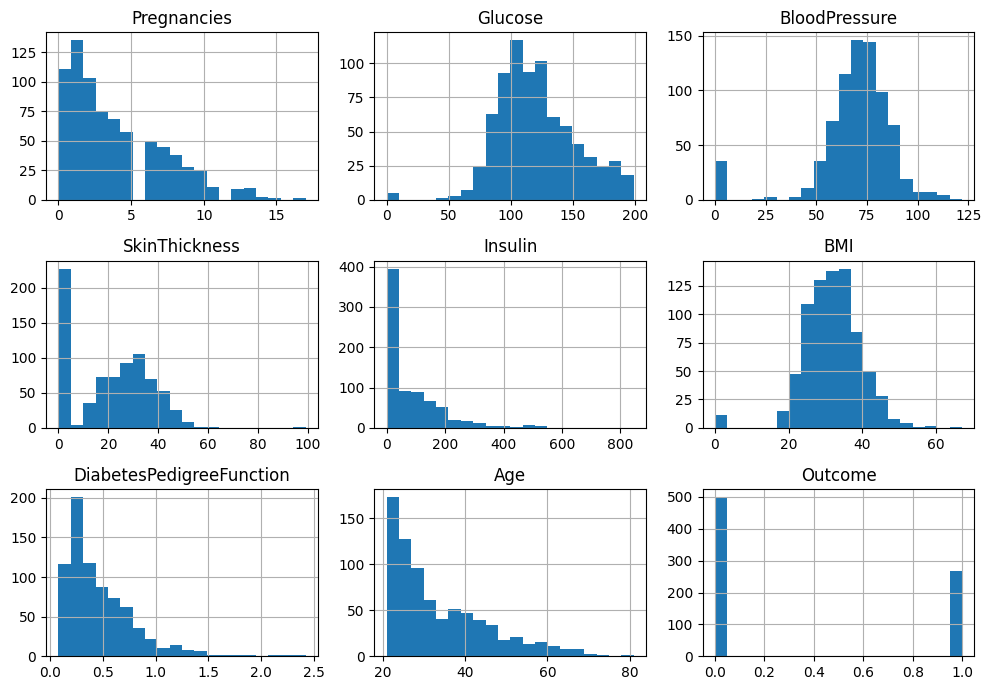

In [5]:
plt.figure(figsize=(10,7))
data.hist(bins=20, figsize=(10,7), layout=(3,3))
plt.tight_layout()
plt.show()

### **Features correlation**

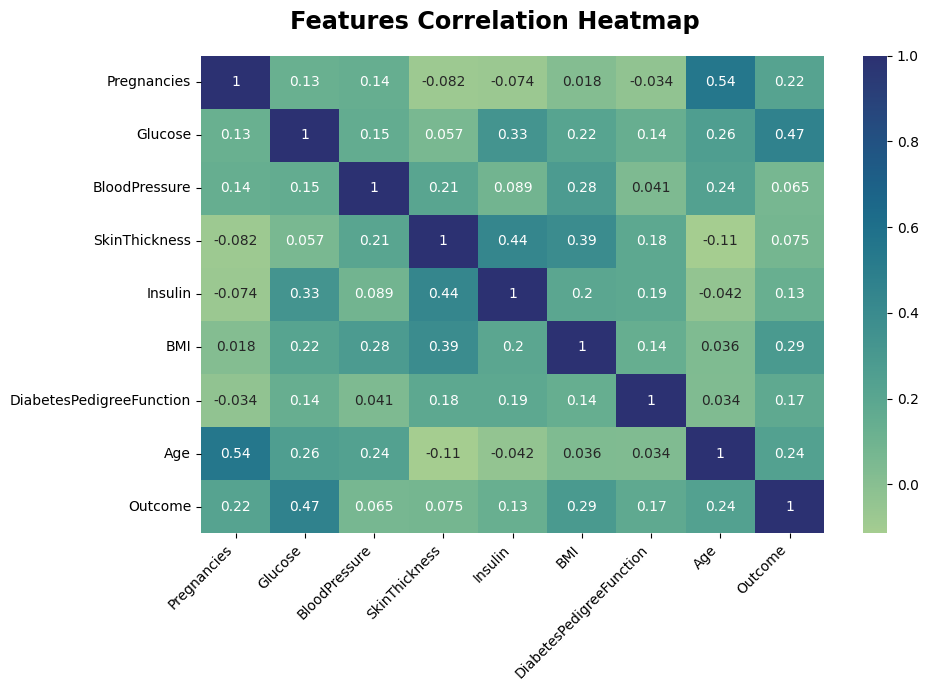

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="crest", ax=ax)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, horizontalalignment='right')
fig.suptitle('Features Correlation Heatmap', fontsize='xx-large', fontweight='bold')
plt.tight_layout()
plt.show()


# **Classification**

### **Splitting the data**
First, splitting the data into a feature matrix X and a target vector y, then into a training set and a test set.

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### **Data scaling**

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Fitting the Models and evaluating their performances**
Training the models on dedicated training set and testing them on unseen data.
* `model.fit(X_train, y_train)`: Model fitting.
* `model.predict(X_test)`: Making predictions on unseen data.
* `accuracy`: Measures the proportion of correctly classified cases.
* `recall`: Measures how many of the actual diabetes cases were correctly identified.

In [10]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
results = {}

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Accuracy: {accuracy:.2f},\tRecall: {recall:.2f}\n')

Logistic Regression:
Accuracy: 0.81,	Recall: 0.62

SVC:
Accuracy: 0.81,	Recall: 0.58

KNN:
Accuracy: 0.75,	Recall: 0.64

Decision Tree:
Accuracy: 0.76,	Recall: 0.65



### **Results Visualization**
Confusion matrices show the full performance of the models by displaying the number of true positives, true negatives, false positives, and false negatives. They help evaluate how well the model distinguishes between classes and identify specific types of errors.

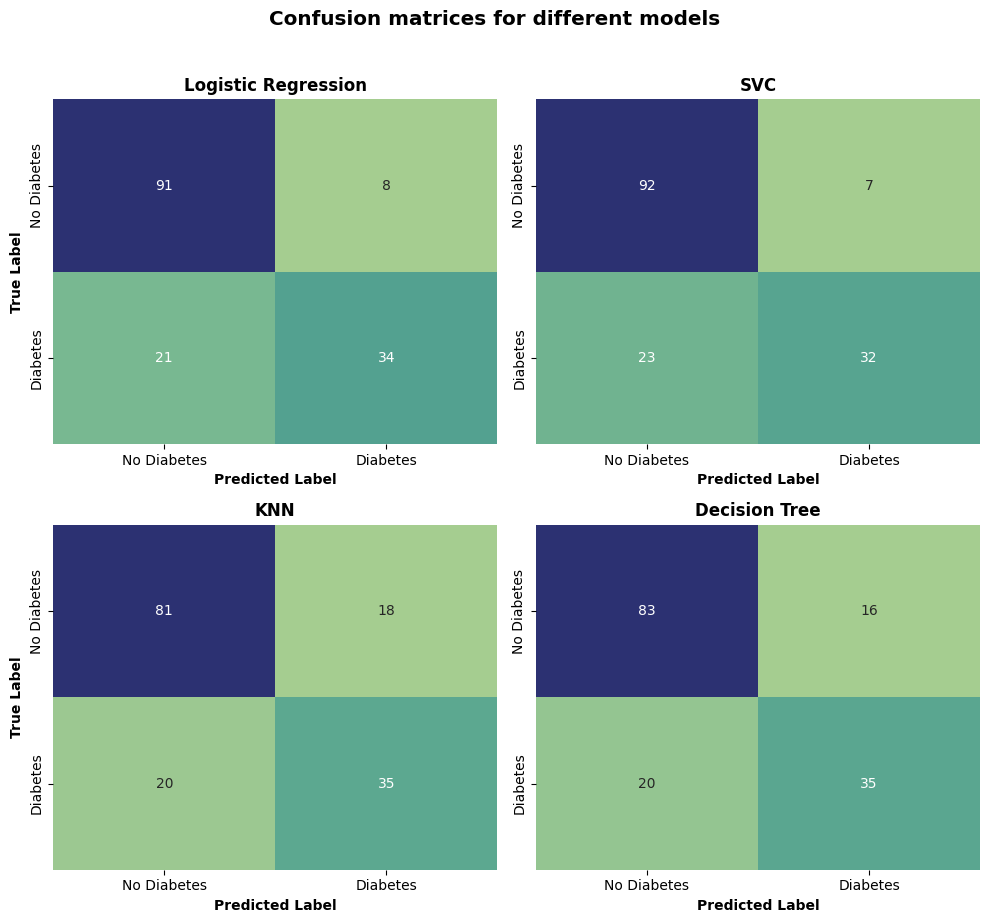

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(10, 9))
ax = ax.ravel()
i = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="crest", cbar=False, xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"], ax=ax[i])

    ax[i].set_title(f'{name}', fontweight='bold')
    ax[i].set_xlabel("Predicted Label", fontweight='bold')
    ax[i].set_ylabel("True Label", fontweight='bold')
    i += 1

ax[1].set_ylabel(None); ax[3].set_ylabel(None)
plt.suptitle('Confusion matrices for different models', fontsize='x-large', fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# **Summary**
The results indicate that **Logistic Regression** and **SVC** achieved the highest accuracy **(0.81)**, while **KNN** and **Decision Tree** performed slightly worse. However, in terms of recall, which measures the model's ability to correctly identify positive cases none of them performed particularly well, the **Decision Tree (0.65)** and **KNN (0.64)** outperformed **Logistic Regression (0.62)** and **SVC (0.58)**. This highlights a trade-off between accuracy and recall—some models are better at overall correctness, while others are better at identifying positive cases. Choosing the right model depends on whether minimizing false negatives or maximizing overall accuracy is more important for the task at hand.